# Lógica para Computação: Tableau Analítico - Lógica de Primeira-Ordem
> *Autor: Davi Romero de Vasconcelos, daviromero@ufc.br, Universidade Federal do Ceará, Campus de Quixadá, Maio de 2022*.
> *(Última atualização 26/05/2022)*

Este material foi preparado para a disciplina de Lógica para Computação com a finalidade de apresentar os conceitos básicos do sistema de Tableau Analítico. 






       

In [ ]:
#@title Implementação em Python do ANITA (ANalytIc Tableau proof Assistant)
#@markdown > **Importante:** 
#@markdown - Os átomos e os predicados são escritos em letras maiúsculas (e.g. A, B,  H(x)).
#@markdown - As variáveis são escritas com a primeira letra em minúsculo, podendo ser seguida de letras e números (e.g. x, x0, xP0).
#@markdown - As fórmulas com o $\forall x$ e $\exists x$ serão representadas por $Ax$ e $Ex$ ('A' e 'E' seguidos da variável x). Por exemplo, Ax (H(x)->M(x)) representa $\forall x~(H(x)\rightarrow M(x))$.
#@markdown - A ordem de precedência dos quantificadores e dos conectivos lógicos é definida por $\lnot,\forall,\exists,\wedge,\vee,\rightarrow$ com alinhamento à direita. Por exemplo: A fórmula ~A&B->C representa a fórmula $(((\lnot A)\land B)\rightarrow C)$.
#@markdown - No ANITA, as palavras *Premissa*, *Conclusão* e *Fechado* são representadas por pre, conclusao e fechado, respectivamente.
#@markdown >
#@markdown > Não é necessário conhecer o código aqui implementado ou mesmo ter um conhecimento profundo da linguagem Python. Basta acompanhar os exemplos e experimentar construir suas próprias demonstrações.
#@markdown > 
#@markdown >*Execute esta célula (`ctrl+enter` ou clicando no botão ao lado) para que o ambiente seja carregado com as classes implementadas.*

#!pip install anita -q
!pip install git+https://github.com/daviromero/anita.git -q
#!pip install logic4py -q
!pip install git+https://github.com/daviromero/logic4py.git -q
from anita.anita_pt_gui import anita, anita_theorem
from logic4py.logic_gui import verify_bound_variables, verify_free_variables, verify_substitution, verify_variables, verify_reasoning, is_substitutable 
from logic4py.example_theorems import THEOREMS as lTheorems
from logic4py.logic_gui import verify_reasoning_fo_q1_ex, verify_reasoning_fo_q2_ex, verify_reasoning_fo_q3_ex, verify_reasoning_fo_q4_ex, verify_reasoning_fo_q5_ex
from logic4py.logic_gui import verify_reasoning_fo_q1, verify_reasoning_fo_q2, verify_reasoning_fo_q3, verify_reasoning_fo_q4, verify_reasoning_fo_q5, verify_reasoning_fo_q6, verify_reasoning_fo_q7, verify_reasoning_fo_q8, verify_reasoning_fo_q9, verify_reasoning_fo_q10, verify_reasoning_fo_q11, verify_reasoning_fo_q12   

from random import randrange



# [Sistema de Tableau Analítico](https://youtu.be/--EkNj3GQI0)

Os sistemas Axiomático e Dedução Natural permitem demonstrar quando uma fórmula é derivada de um conjunto de fórmulas ($\Gamma\vdash\varphi$). Contudo, nenhum desses métodos nos permite inferir que $\Gamma\not\vdash\varphi$. 
Note que $\Gamma\not\vdash\varphi$ não implica em $\Gamma\vdash\lnot\varphi$. 


O método da Tabela da Verdade é um procedimento de decisão que nos permite demonstrar se $\Gamma\vdash\varphi$ ou $\Gamma\not\vdash\varphi$. Contudo, esse procedimento tem um crescimento no número de linhas exponencial em relação ao número de símbolos proposicionais. O sistema de inferência de **Tableau Analítico (Semântico)** é um método de decisão que não necessariamente gera provas de tamanho exponencial.

O Sistema Tableau é um método de inferência baseado em *refutação*: para provarmos $\Gamma\vdash\varphi$, afirmamos a *veracidade* de $\Gamma$ e a *falsidade* de $\varphi$, na esperança de derivarmos uma *contradição*.  Por outro lado, se não for obtida uma contradição, então teremos construído um *contra-exemplo*, i.e., uma valoração que satisfaz $\Gamma$ e não satisfaz $\varphi$. Para afirmar a veracidade ou falsidade de uma fórmula, o método dos tableaux analíticos marca as fórmulas com os símbolos $T$ para verdade e $F$ para falsidade. 

O passo inicial na criação de um tableau é marcar todas as fórmulas de $\Gamma$ com $T$ e a fórmula $\varphi$ com $F$. A partir do tableau inicial, utiliza-se regras de expansão do tableau que adicionam novas fórmulas ao final de um ramo (regras do tipo $\alpha$) ou que bifurcam um ramo em dois (regras do tipo $\beta$).
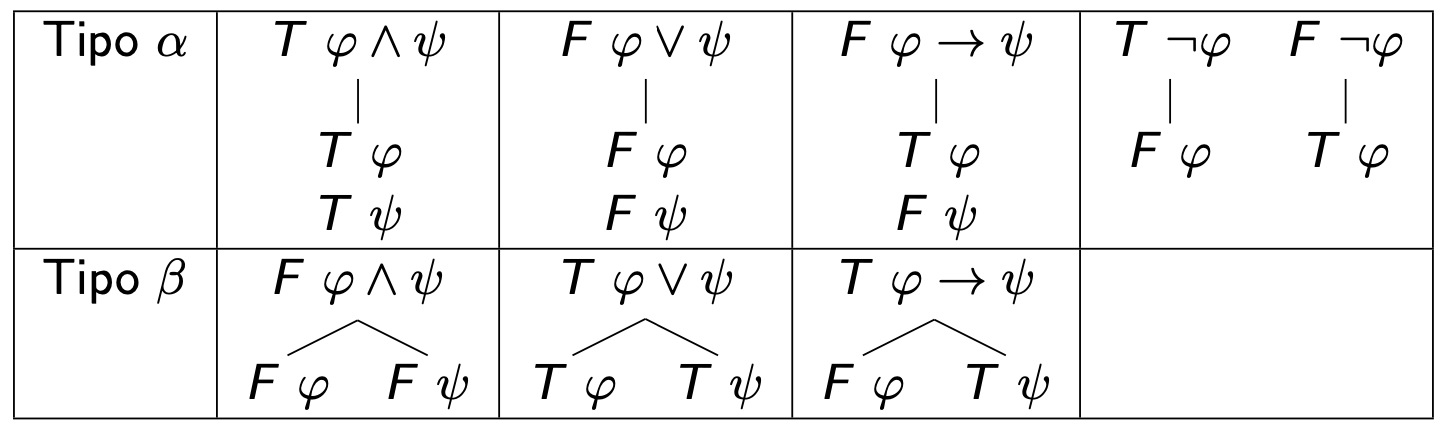

As regras de derivação são aplicadas considerando que:
- Uma **fórmula** só pode ser expandida uma **única vez por ramo**.
- Um **ramo é saturado** se não possui mais fórmulas para expandir.
- Um **ramo é fechado** se possui uma par de fórmulas $T~\varphi$ e $F~\varphi$. Um ramo fechado não precisa mais ser expandido.
- Um **tableau é fechado** se todos os seus ramos são fechados. Neste caso, temos que $\Gamma\vdash\varphi$.
- Um **ramo saturado e não fechado** demonstra que $\Gamma\not\vdash\varphi$, na qual podemos extrair um **contra-exemplo**, na qual identificamos os rótulos de todos os átomos com seus respectivos valores-verdade.


Abaixo, apresentamos três exemplos de demonstrações em Tableau Analítico.
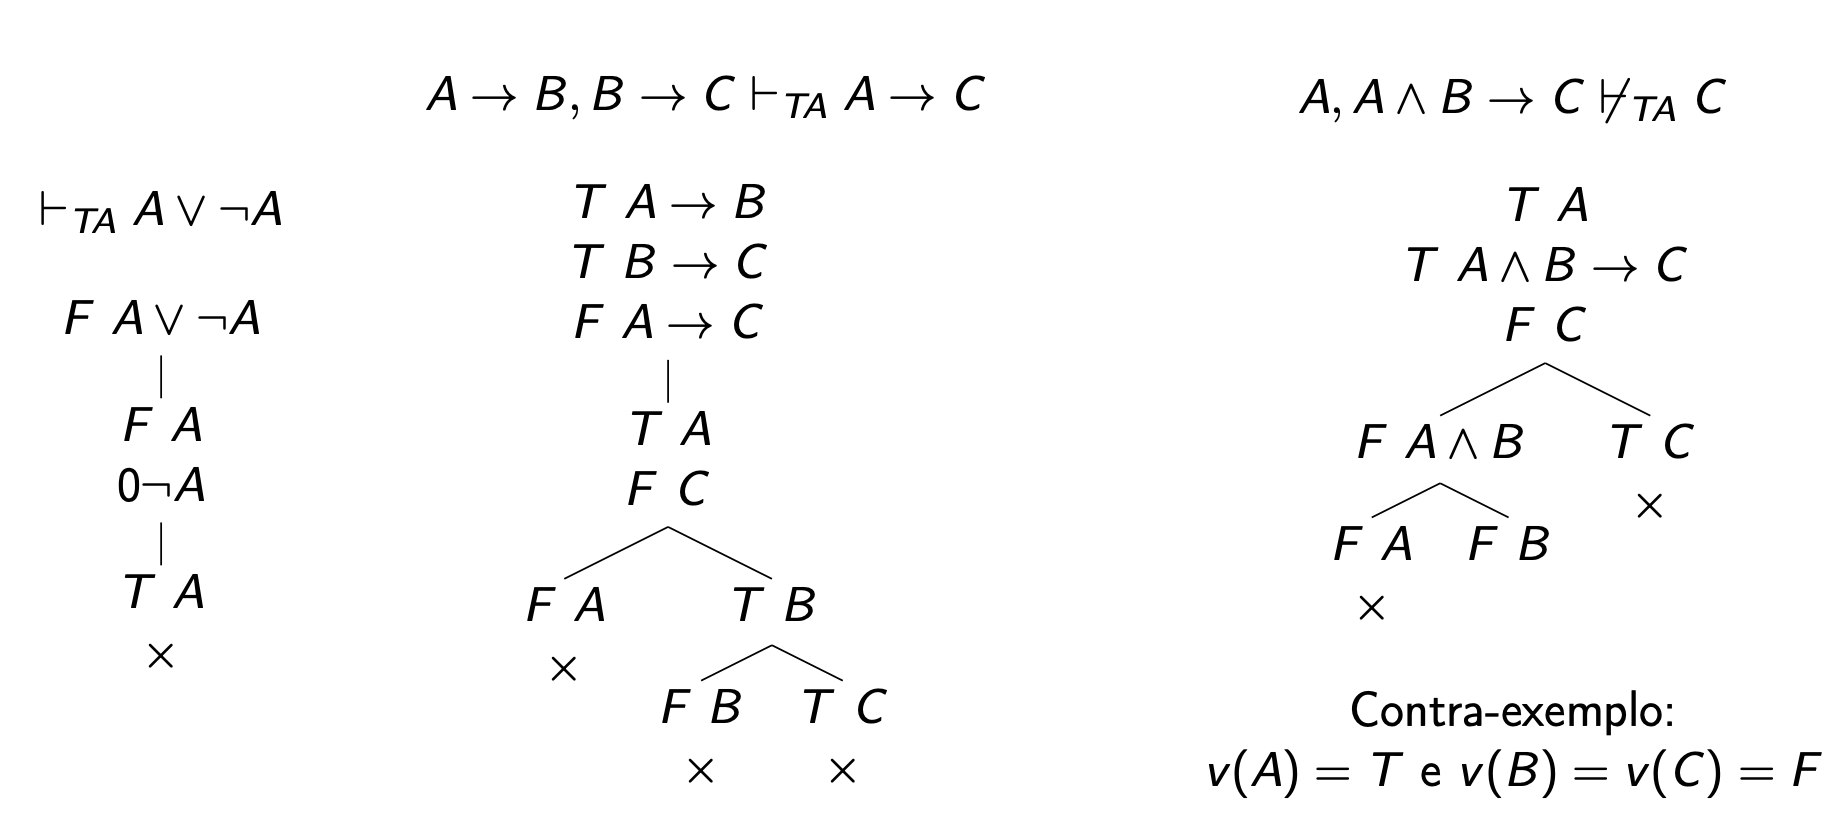

O Sistema de Tableau Analítico pode ser expandido para incluir as demonstrações da Lógica de Primeira-Ordem, no qual temos todas as regras da Lógica Proposicional e as seguintes regras:

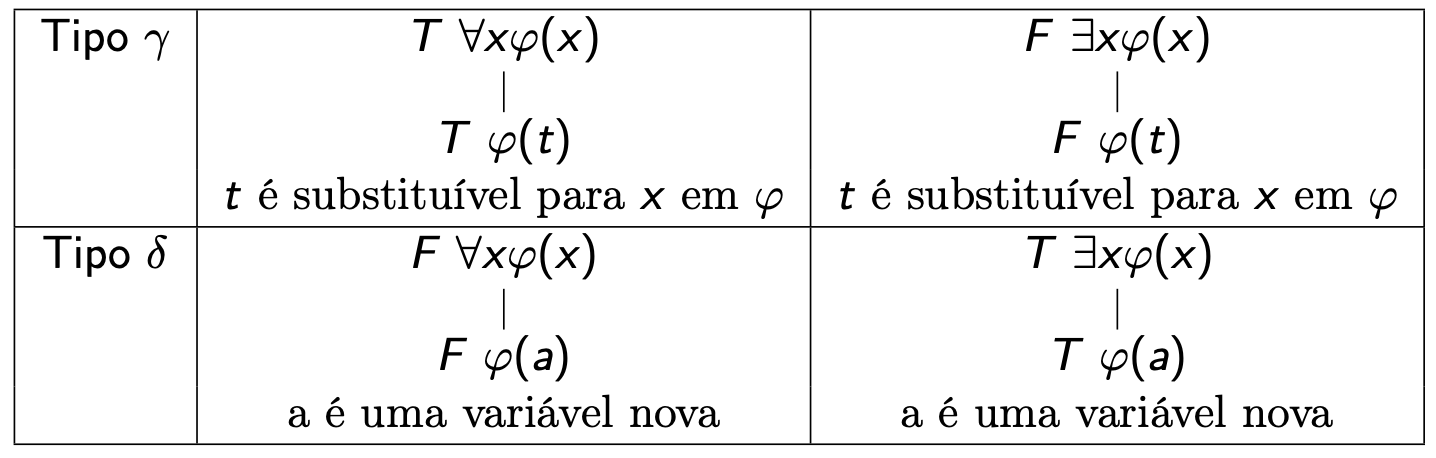

As regras acima podem ocorrer mais de uma vez em cada ramo, pois podemos fazer arbitrárias substituições de variáveis. Dessa forma, no caso geral, não conseguiremos gerar um contra-exemplo.

Abaixo apresentamos exemplos de provas em Tableau Analítico na Lógica de Primeira-Ordem

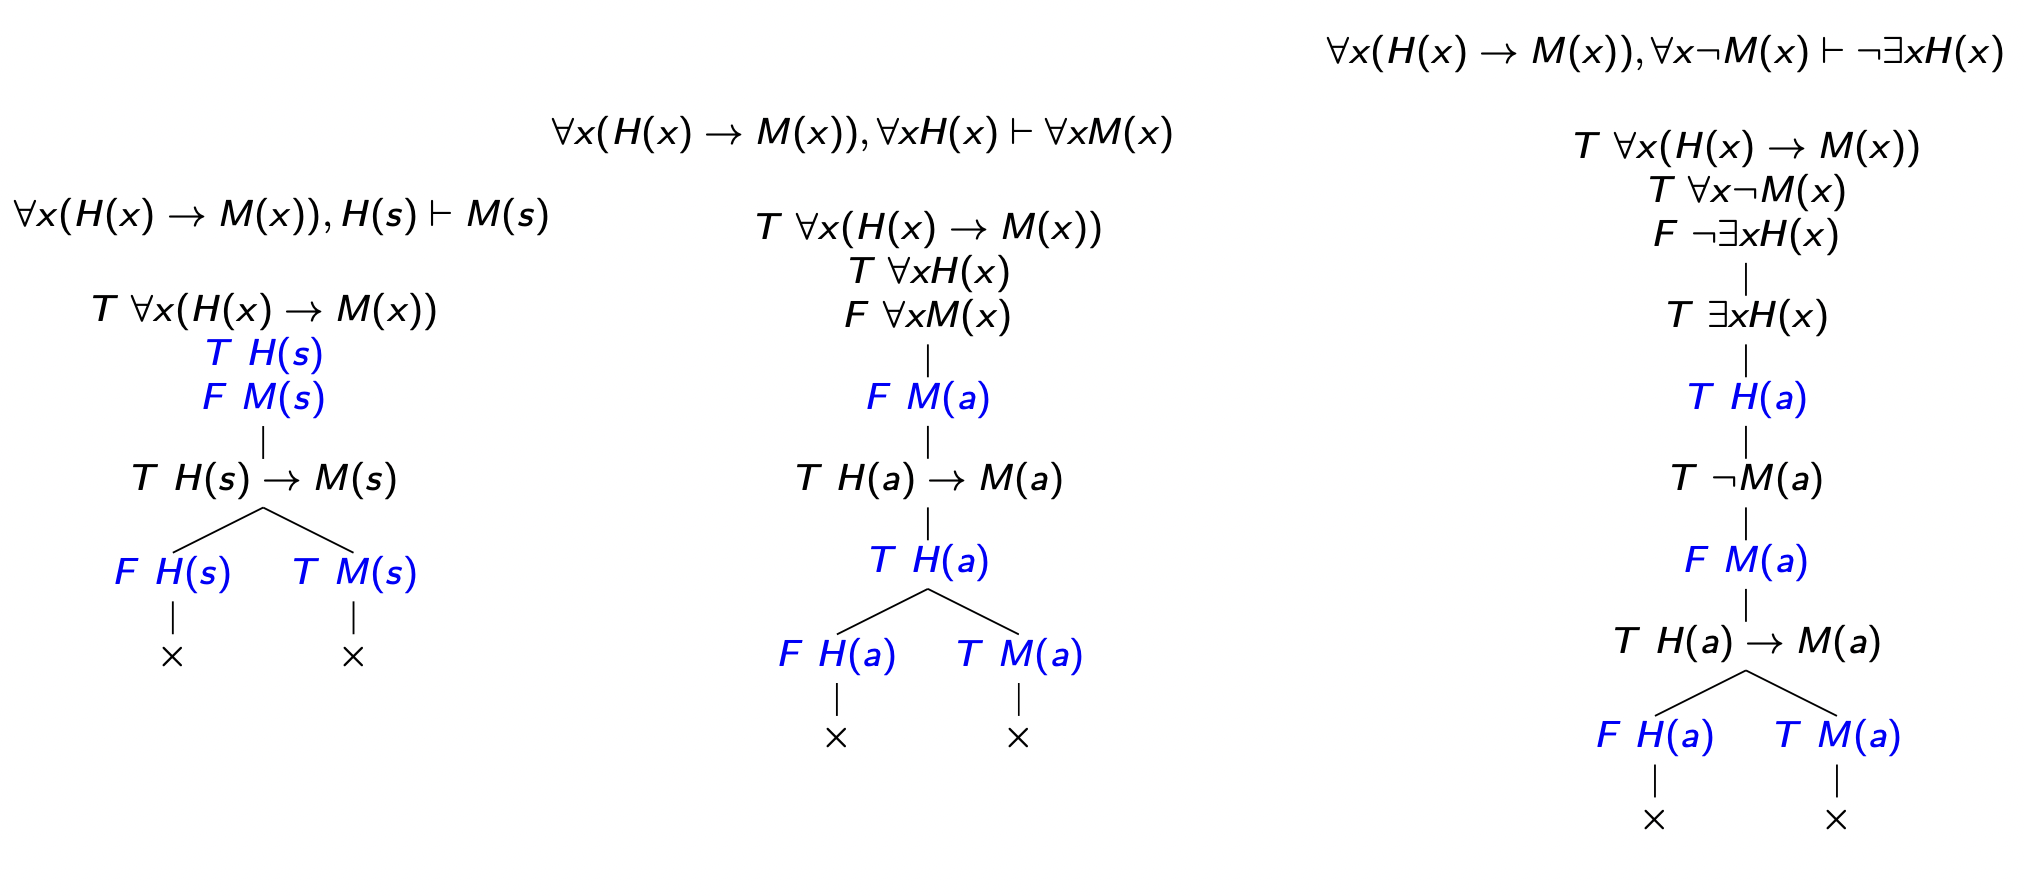

## Tableau Analítico no Estilo Sequencial

Para facilitar a compreensão dos estudantes, propomos escrever as demonstrações em Tableau Analítico por meio sequencial de modo semelhante ao Estilo de Fitch de Dedução Natural. A seguir iremos apresentar as regras de Tableau neste estilo.


O primeiro passo em uma demonstração $\varphi_1,\varphi_2,\ldots,\varphi_n\vdash\psi$ em Tableau é definir o Tableau Inicial. A Figura abaixo apresenta a representação geral desta definição, na qual:
- As premissas $\varphi_1,\varphi_2,\ldots,\varphi_n$ são representadas em uma linha cada, seguindo uma numeração sequencial, rotulado como $T$ (*True*) e como justificativa "Premissa"
- A conclusão $\psi$ é definida na linha posterior a última premissa, rotulada por $F$ (*False*) e com a justificativa "Conclusão". 

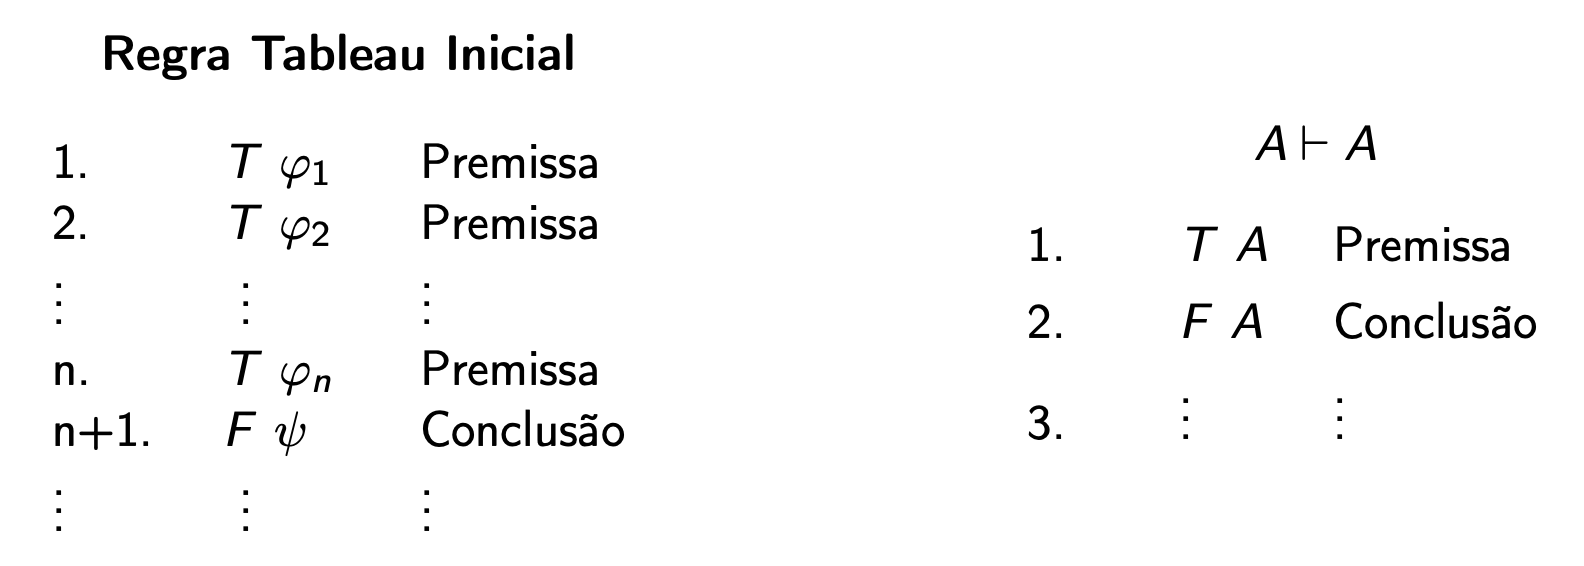

## Regra Ramo Fechado
Dizemos que um **ramo está fechado** (contém uma contradição $\bot$) em uma linha $p$ se uma fórmula $\varphi$ está rotulada em uma linha $m$ com $T$ e em outra linha $n$ com $F$ (ambas anteriores a $p$). Um ramo fechado não pode mais ser expandido. Na Figura abaixo apresentamos o esquema geral desta regra, bem como o exemplo da demonstração de $A\vdash A$, na qual fechamos o (único) ramo na linha $3$ a partir da fórmula $A$ referenciada nas linhas $1$ e $2$ como $T$ e $F$, respectivamente.

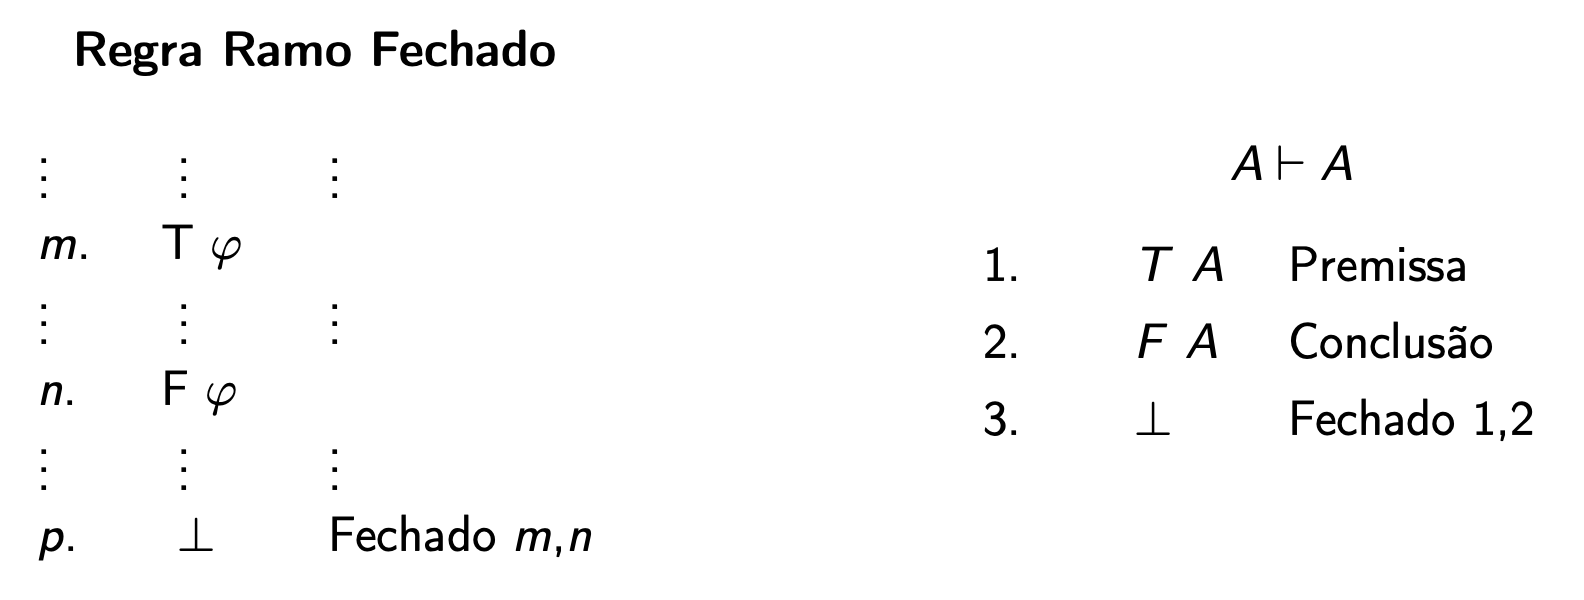

In [ ]:
#@title ANITA - Exemplo: $A\vdash A$ 
#@markdown Execute essa célula para gerar o seu exercício.
anita('''1. T A    pre
2. F A    conclusao
3. @      fechado 1,2''',height_layout='60px')

## Regra Negação

A **regra da negação $\lnot T$** é apresentada na Figura abaixo, na qual a fórmula $\varphi$ marcada com $F$ pode ser concluída na linha $n$ a partir da fórmula $\lnot\varphi$ rotulada com $T$ da linha $m$. De forma análoga, a **regra da negação $\lnot F$** pode concluir $\varphi$ marcada com $T$ na linha $n$ a partir da fórmula $\lnot\varphi$ rotulada com $F$ na linha $m$. Por exemplo, na Figura abaixo, podemos concluir na $3$ $T~\lnot A$. Daí, podemos aplica a regra $\lnot T$ e concluir $F~A$ na linha $4$. Por fim, podemos fechar o ramo (com a contradição), pois temos a $T~A$ na linha $1$ e $F~A$ na linha $4$.

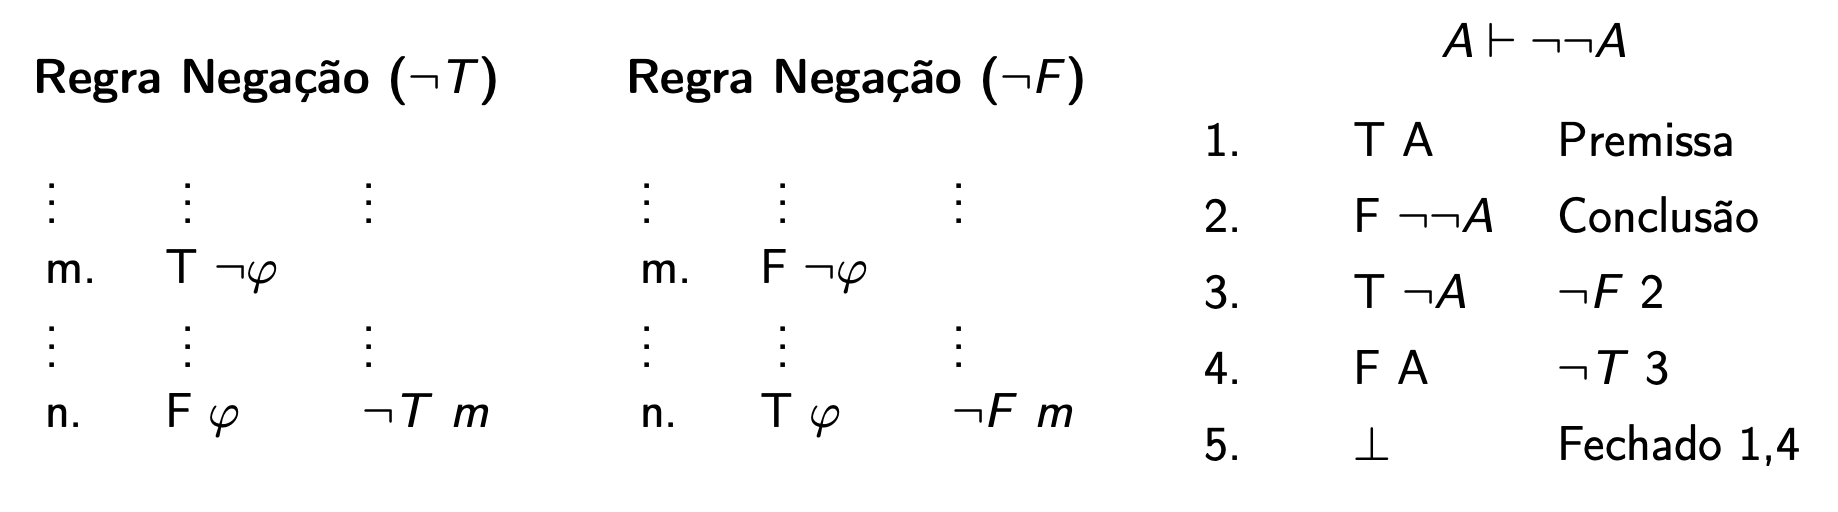

In [ ]:
#@title ANITA - Exemplo: $A\vdash \lnot \lnot A$ 
#@markdown Execute essa célula para gerar o seu exercício.
anita('''1. T A      pre
2. F ~~A    conclusao
3. T ~A     ~F 2
4. F A      ~T 3
5. @        fechado 1,4''', height_layout='120px')

## Regra da Conjunção $\land T$

A **regra da conjunção $\land T$** é apresentada na Figura abaixo, na qual as fórmulas $\varphi$ e $\psi$ marcadas com $T$ podem ser concluídas nas linhas $n$ e $n+1$, respectivamente, a partir da fórmula $\varphi\land\psi$ rotulada com $T$ da linha $m$. Importante notar que a regra impõe a conclusão de ambas as fórmulas $\varphi$ e $\psi$. Por exemplo, na Figura abaixo, podemos concluir $T~A$ e $T~B$, nas linhas $3$ e $4$, a partir da regra $\land T$ de $T~A\land B$ da linha $1$.

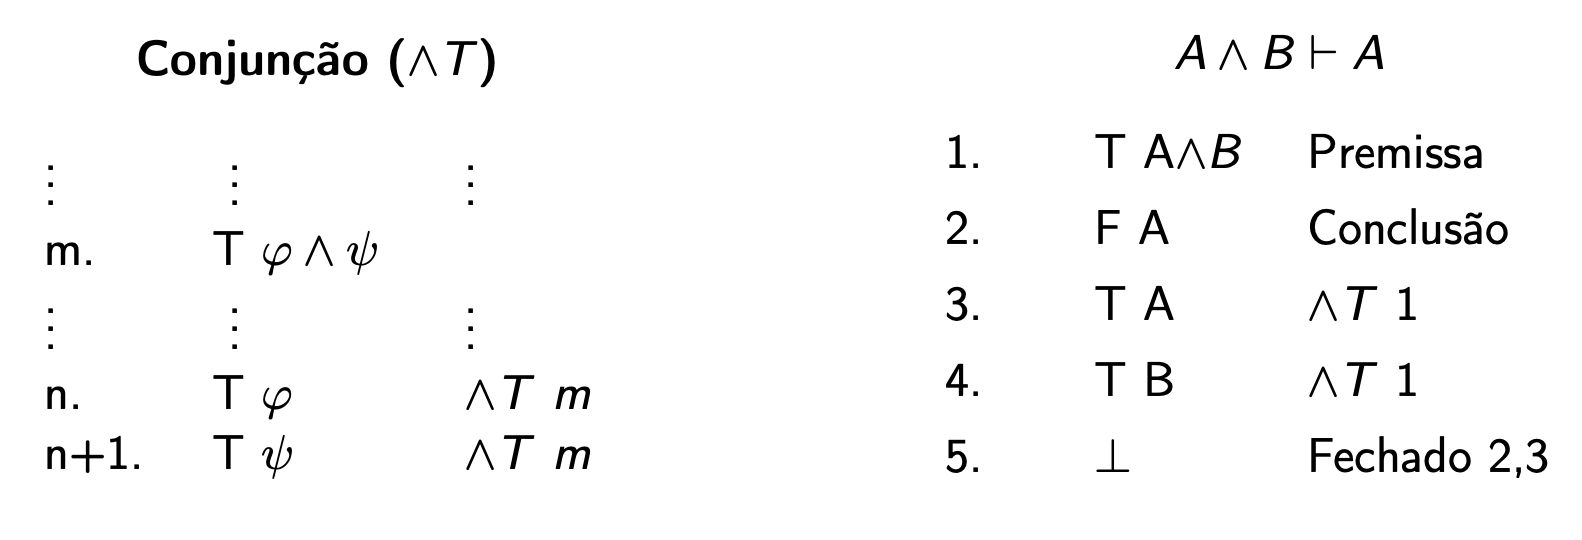

In [ ]:
#@title ANITA - Exemplo: $A\land B\vdash A$ 
#@markdown Execute essa célula para gerar o seu exercício.
anita('''1. T A&B    pre
2. F A      conclusao
3. T A      &T 1
4. T B      &T 1
5. @        fechado 2,3''', height_layout='120px')

## Regra da Conjunção $\land F$

A **regra da conjunção $\land F$** é apresentada na Figura abaixo, na qual $F~\varphi\land\psi$ bifurca o ramo em dois novos ramos: um que inicia na linha $n$ com $F~\varphi$; e, outro na linha $p$ com $F~\psi$. Para delimitarmos os respectivos ramos, usamos os símbolos $\{$ e $\}$. Por exemplo, na Figura abaixo, aplicando a regra $\land F$ na linha $3$ com $F~A\wedge B$, bifurcamos este ramo:
1. No ramo que inicia na linha $4$ com $F~A$ que é utilizado com $T~A$ da linha $1$ para fechar este ramo na linha $5$.
1. No ramo que inicia na linha $6$ com $F~B$ que é utilizado com $T~B$ da linha $2$ para fechar este ramo na linha $7$. 

Importante notar que só podemos referenciar as fórmulas demonstradas no mesmo ramo. Assim, por exemplo, a fórmula $F~A$ da linha $4$ não poderia ser referenciada no ramo que inicia na linha $6$.

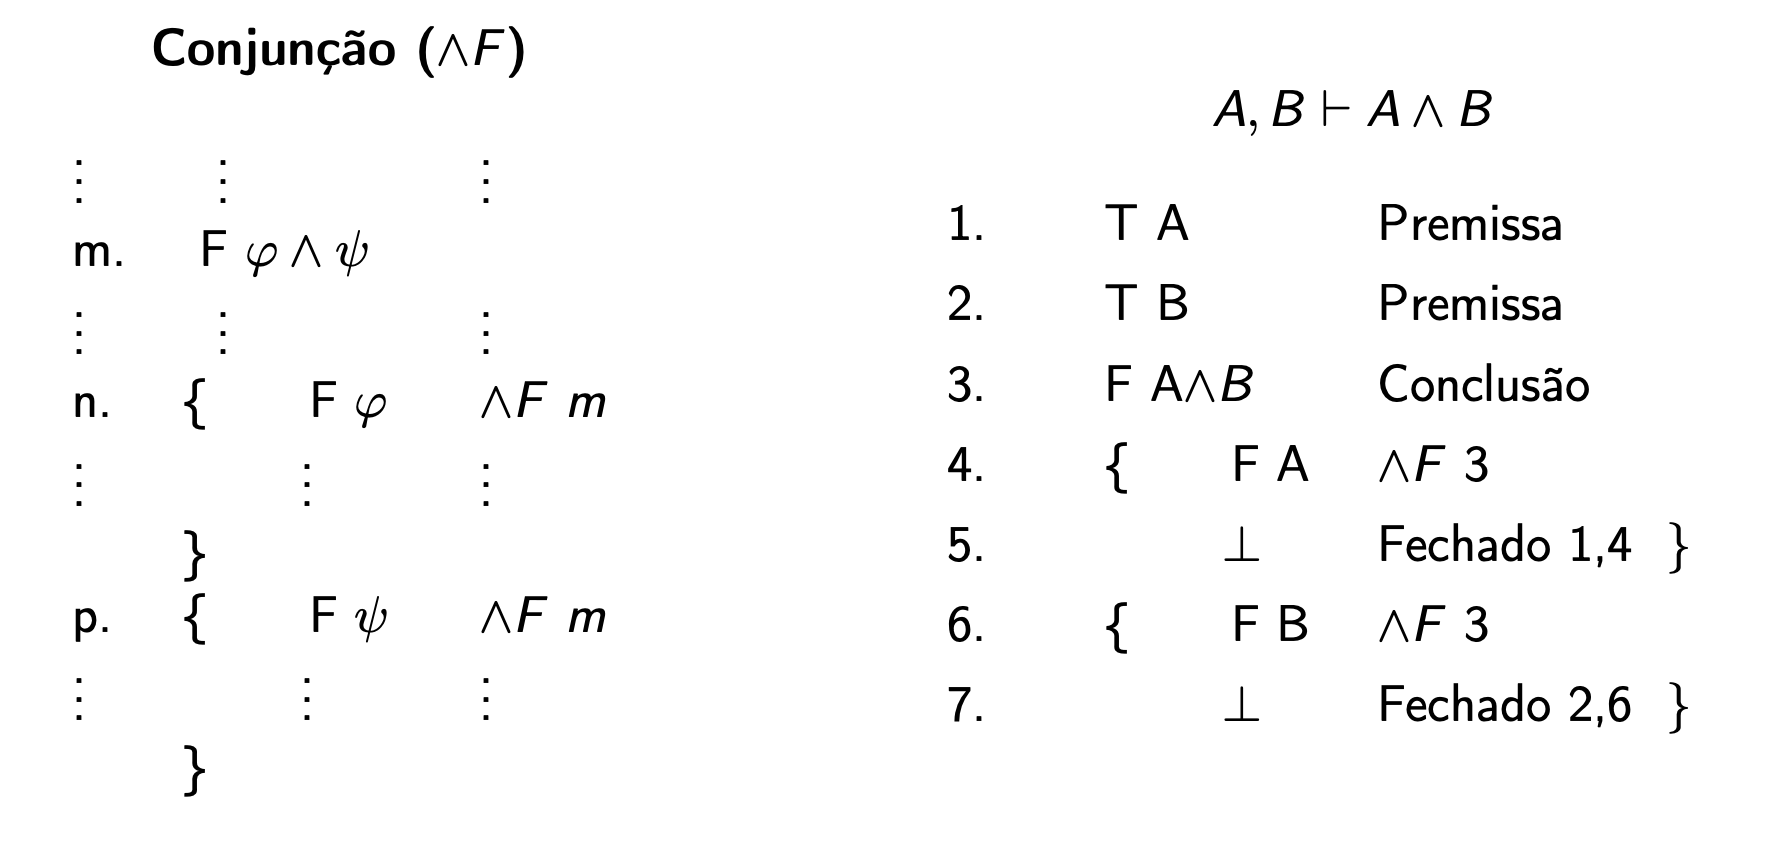

In [ ]:
#@title ANITA - Exemplo: $A,B\vdash A\land B$ 
#@markdown Execute essa célula para gerar o seu exercício.
anita('''1. T A         pre
2. T B         pre
3. F A&B       conclusao
4. {  F A      &F 3
5.    @        fechado 1,4
   }
6. {  F B      &F 3
7.    @        fechado 2,6
   }''', height_layout='150px')

## Regra da Disjunção $\lor T$

A **regra da disjunção $\lor T$** é apresentada na Figura abaixo, na qual $T~\varphi\lor\psi$ bifurca o ramo em dois novos ramos: um que inicia na linha $n$ com $T~\varphi$; e, outro na linha $p$ com $T~\psi$. Por exemplo, na Figura abaixo, aplicando a regra $\lor T$ na linha $1$ com $T~A\lor B$, bifurcamos este ramo a partir da linha $4$:
1. No ramo que inicia na linha $5$ com $T~A$ que é utilizado com $F~A$ da linha $3$ para fechar este ramo na linha $6$.
1. No ramo que inicia na linha $7$ com $T~B$ que é utilizado com $F~B$ da linha $4$ para fechar este ramo na linha $8$. 

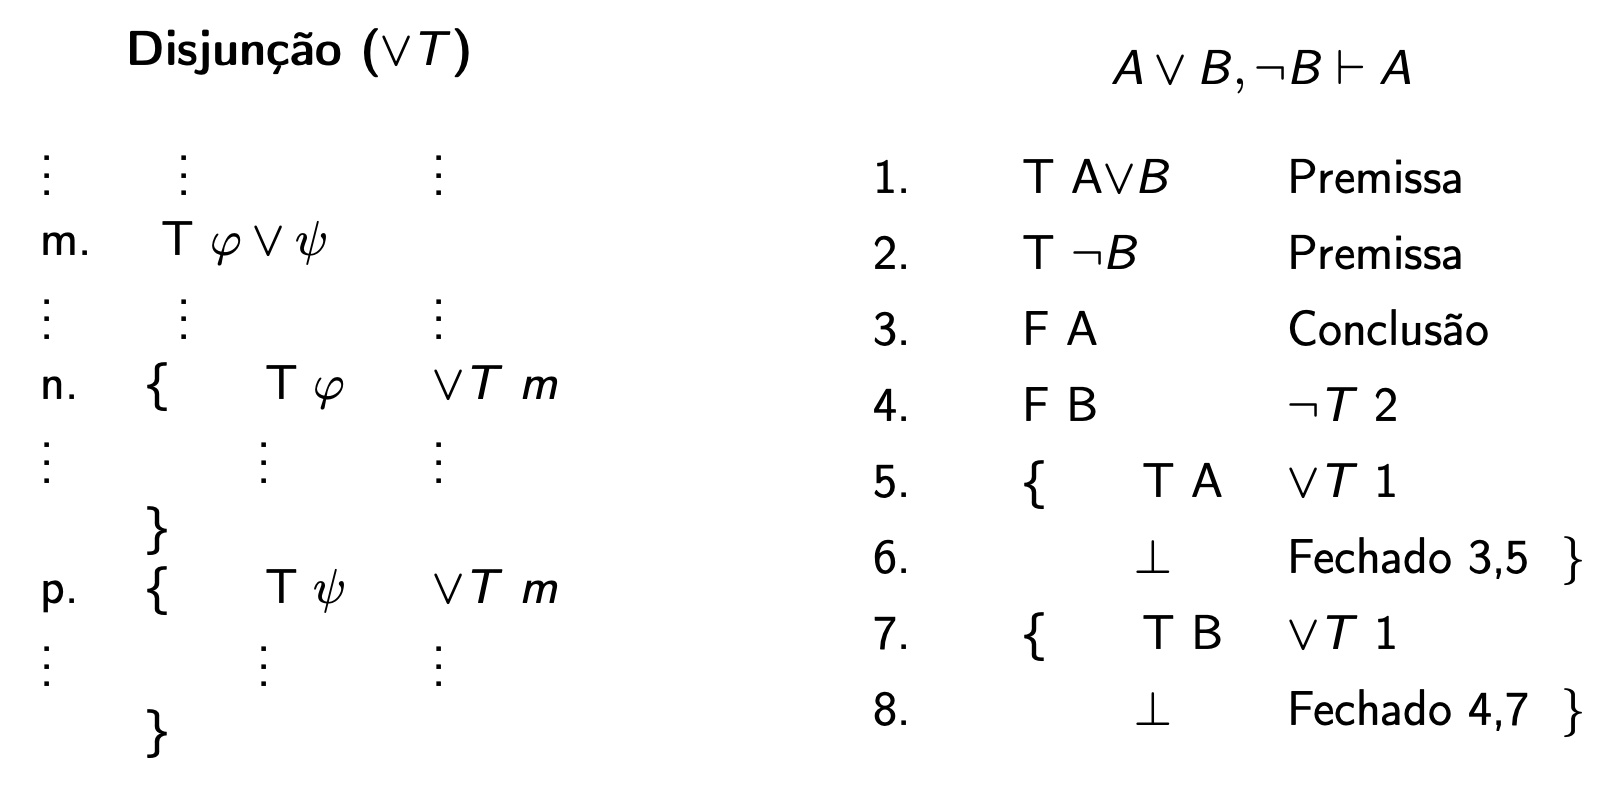

In [ ]:
#@title ANITA - Exemplo: $A\lor B,\lnot B\vdash A$ 
#@markdown Execute essa célula para gerar o seu exercício.
anita('''1. T A|B        pre
2. T ~B         pre
3. F A          conclusao
4. F B          ~T 2
5. {  T A       |T 1
6.    @         fechado 3,5
   }
7. {  T B       |T 1
8.    @         fechado 4,7
   }''', height_layout='200px')

## Regra da Disjunção $\lor F$

A **regra da disjunção $\lor F$** é apresentada na Figura abaixo, na qual as fórmulas $\varphi$ e $\psi$ marcadas com $F$ podem ser concluídas nas linhas $n$ e $n+1$, respectivamente, a partir da fórmula $\varphi\lor\psi$ rotulada com $F$ da linha $m$. Importante notar que a regra impõe a conclusão de ambas as fórmulas $\varphi$ e $\psi$. Por exemplo, na Figura abaixo, podemos concluir $F~A$ e $F~B$, nas linhas $3$ e $4$, respectivamente, a partir da regra $\land F$ de $F~A\lor B$ da linha $2$.

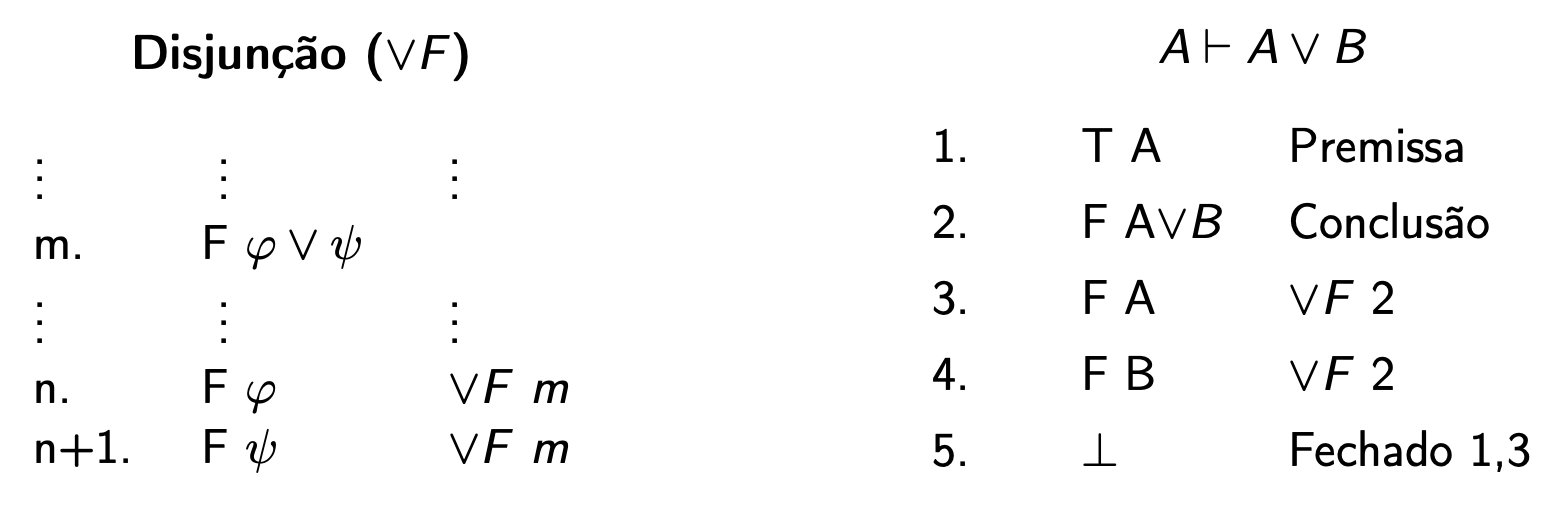

In [ ]:
#@title ANITA - Exemplo: $A\vdash A\lor B$ 
#@markdown Execute essa célula para gerar o seu exercício.
anita('''1. T A          pre
2. F A|B        conclusao
3. F A          |F 2
4. F B          |F 2
5. @            fechado 1,3''', height_layout='120px')

## Regra da Implicação $\rightarrow T$

A **regra da disjunção $\rightarrow T$** é apresentada na Figura abaixo, na qual $T~\varphi\rightarrow\psi$ bifurca o ramo em dois novos ramos: um que inicia na linha $n$ com $F~\varphi$; e outro na linha $p$ com $T~\psi$. Por exemplo, na Figura abaixo, aplicando a regra $\rightarrow T$ na linha $1$ com $T~\lnot A\rightarrow B$, bifurcamos este ramo a partir da linha $4$:
1. No ramo que inicia na linha $5$ com $F~\lnot A$, na qual aplicamos a regra $\lnot F$ para concluir $T~A$ na linha $6$ e, por fim, usamos $F~A$ da linha $3$ para fechar este ramo na linha $7$.
1. No ramo que inicia na linha $8$ com $T~B$ que é utilizado com $F~B$ da linha $4$ para fechar este ramo na linha $9$. 

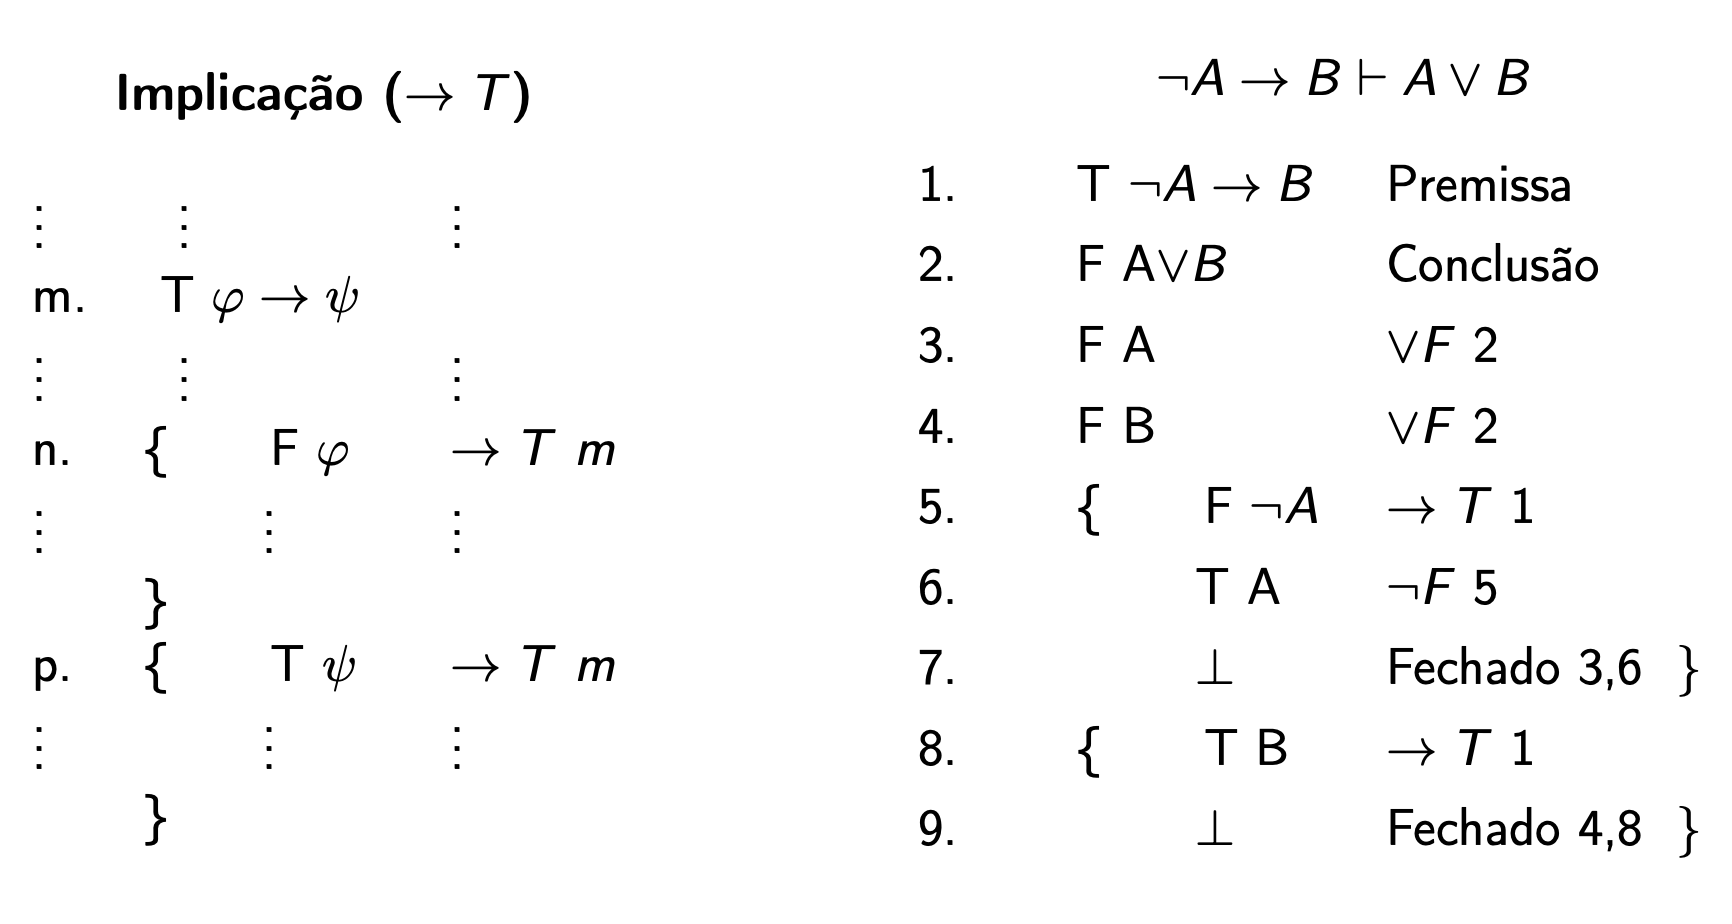

In [ ]:
#@title ANITA - Exemplo: $\lnot A\rightarrow B\vdash A\lor B$ 
#@markdown Execute essa célula para gerar o seu exercício.
anita('''1. T ~A->B      pre
2. F A|B        conclusao
3. F A          |F 2
4. F B          |F 2
5. {  F ~A      ->T 1
6.    T A       ~F 5
7.    @         fechado 3,6
   }
8. {  T B       ->T 1
9.    @         fechado 4,8
   }''', height_layout='200px')

## Regra da Implicação $\rightarrow F$

A **regra da implicação $\rightarrow F$** é apresentada na Figura abaixo, na qual as fórmulas $\varphi$ e $\psi$ marcadas com $T$ e $F$, respectivamente, podem ser concluídas nas linhas $n$ e $n+1$, respectivamente, a partir da fórmula $\varphi\rightarrow\psi$ rotulada com $F$ da linha $m$. Importante notar que a regra impõe a conclusão de ambas as fórmulas $\varphi$ e $\psi$. Por exemplo, na Figura abaixo, podemos concluir $T~A$ e $F~B$, nas linhas $3$ e $4$, respectivamente, a partir da regra $\rightarrow F$ de $F~A\rightarrow B$ da linha $2$.

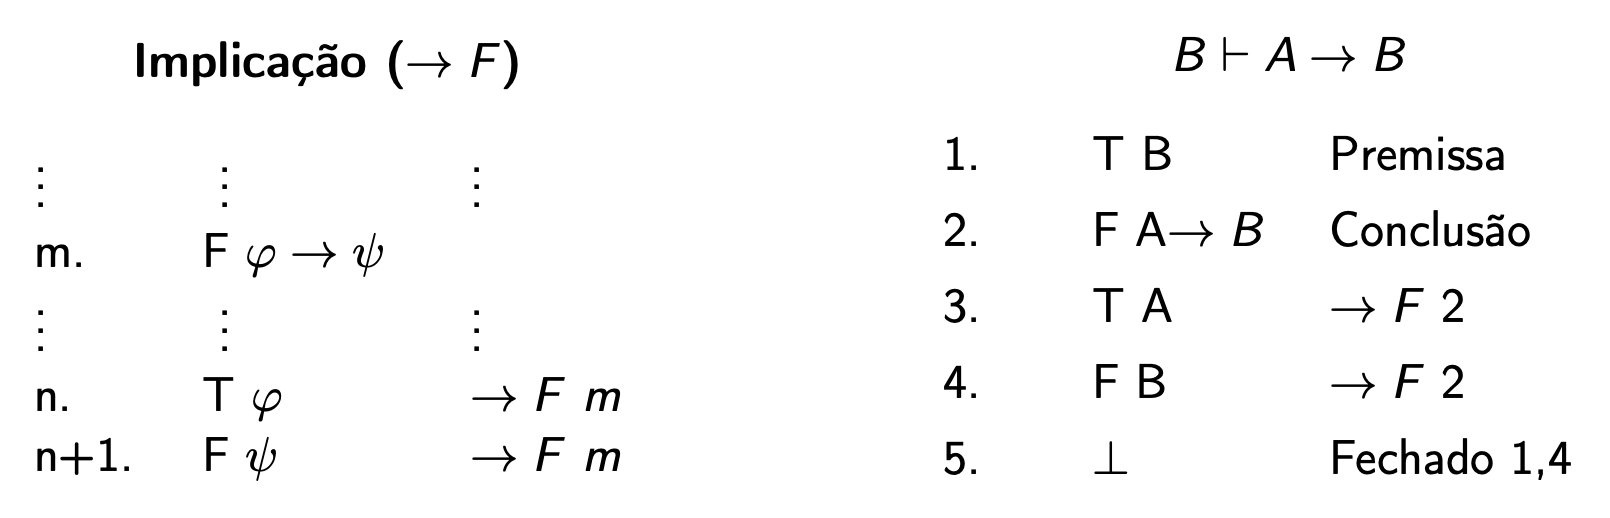

In [ ]:
#@title ANITA - Exemplo: $B\vdash A\rightarrow B$ 
#@markdown Execute essa célula para gerar o seu exercício.
anita('''1. T B          pre
2. F A->B       conclusao
3. T A          ->F 2
4. F B          ->F 2
5. @            fechado 1,4''', height_layout='120px')

## Regras da Lógica de Primeira-Ordem

Para definir as regras dos quantificadores, precisamos entender os conceitos de substituição de uma variável por um termo em uma fórmula e se um termo é substituível para uma variável em uma fórmula. A seguir, iremos apresentar alguns exercícios para recapitular esses conceitos.

In [ ]:
#@title Exercício 1 (Substituição):
#@markdown Execute essa célula para gerar o seu exercício.
verify_substitution('', input_formula='Ay (P(x,y)->M(x))', input_var='x', input_term='a')

In [ ]:
#@title Exercício 2 (Substituição):
#@markdown Execute essa célula para gerar o seu exercício.
verify_substitution('', input_formula='Ay (P(x,y)->M(x))', input_var='x', input_term='y')

In [ ]:
#@title Exercício 3 (Substituição):
#@markdown Execute essa célula para gerar o seu exercício.
verify_substitution('', input_formula='Ay (P(x,y)->Ax M(x))', input_var='x', input_term='a')

In [ ]:
#@title Exercício 4 (Substituível):
#@markdown Execute essa célula para gerar o seu exercício.
is_substitutable(input_formula='Ay P(x,y)', input_var ='x', input_term='a')

In [ ]:
#@title Exercício 5 (Substituível):
#@markdown Execute essa célula para gerar o seu exercício.
is_substitutable(input_formula='Ay P(x,y)', input_var ='x', input_term='y')

## Regra do Universal $\forall T$

A **regra do universal $\forall T$** é apresentada na Figura abaixo, na qual, a partir da fórmula $\forall x\varphi$ marcada com $T$, na linha $m$, podemos concluir, na linha $n$, a fórmula $\varphi^x_t$ marcada com $T$, desde que o termo $t$ seja substituível para a variável $x$ em $\varphi$. Na Figura abaixo, ilustramos o uso desta regra para concluir $T~H(s)\rightarrow M(s)$ na linha $4$, a partir da $T~\forall x(H(x)\rightarrow M(x))$ da linha $1$.

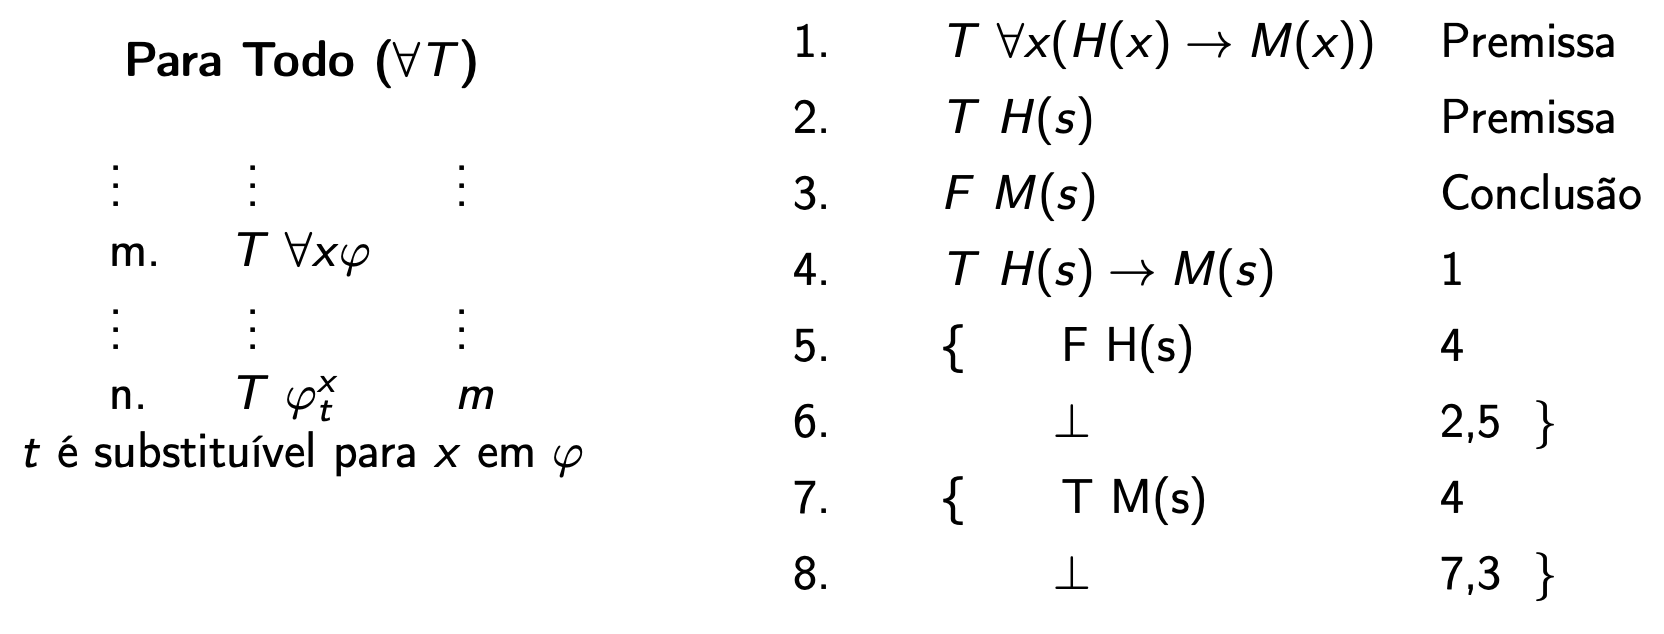

In [ ]:
#@title ANITA - Exemplo: $\forall x(H(x)\rightarrow M(x)), H(s)\vdash M(s)$ 
#@markdown Execute essa célula para gerar o seu exercício.
anita('''1. T Ax(H(x)->M(x))     pre
2. T H(s)               pre
3. F M(s)               conclusao
4. T H(s)->M(s)         1
5. {  F H(s)            4
6.    @                 2,5 }
7. {  T M(s)            4
8.    @                 7,3 }''', height_layout='130px')

## Regra do Universal $\forall F$

A **regra do universal $\forall F$** é apresentada na Figura abaixo, na qual, a partir da fórmula $\forall x\varphi$ marcada com $F$, na linha $m$, podemos concluir, na linha $n$, a fórmula $\varphi^x_a$ marcada com $F$, desde que a variável $a$ seja uma nova variável, ou seja, que não ocorreu anteriormente no ramo. Lembre-se que $\lnot \forall x \varphi(x)\vdash \exists x\lnot \varphi(x)$. Na Figura abaixo, ilustramos o uso desta regra para concluir $F~M(a)$ na linha $3$, a partir da $F~\forall x M(x)$ da linha $3$.

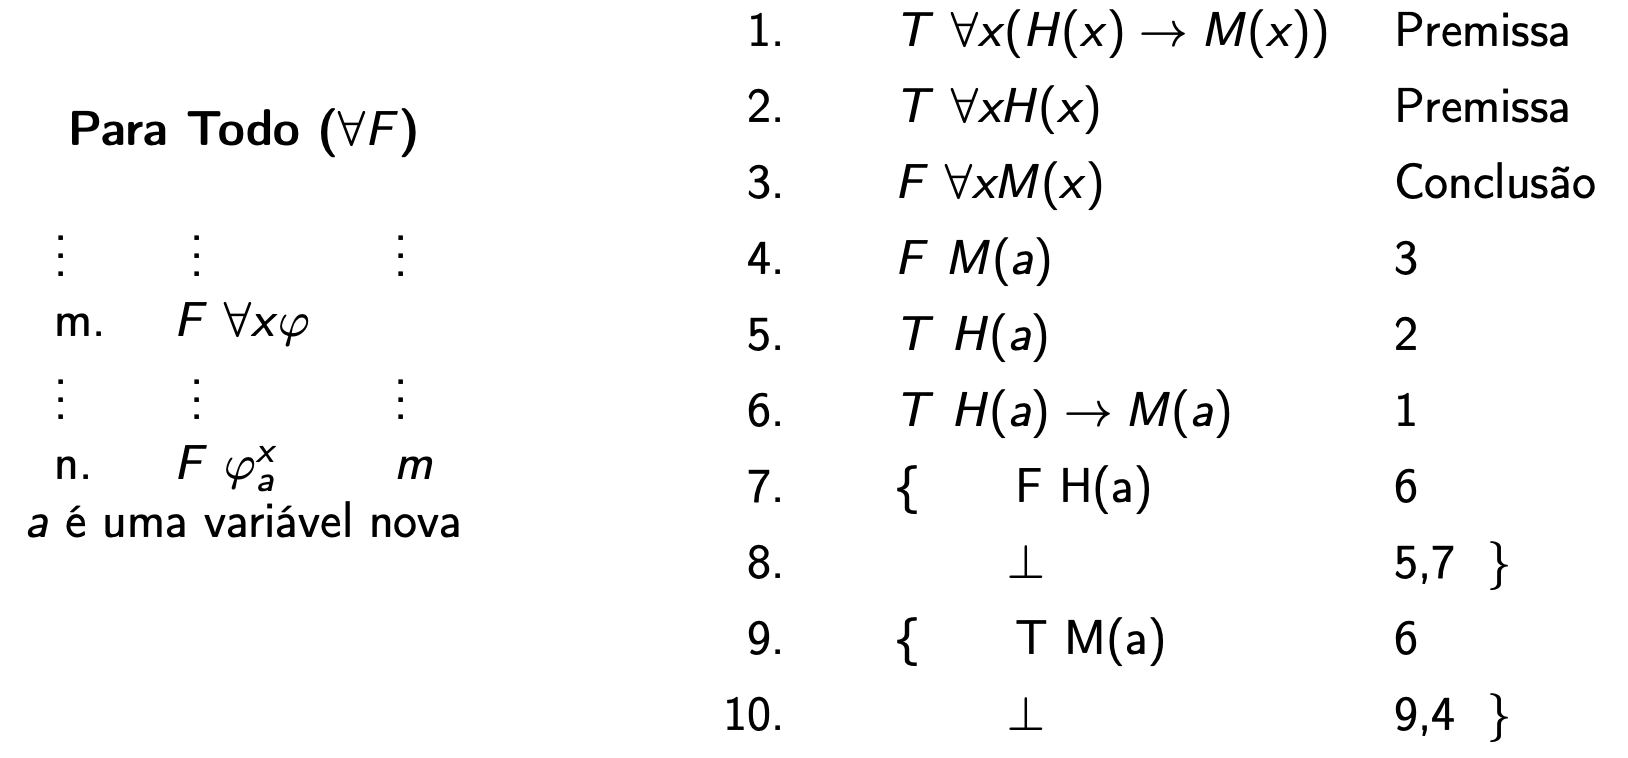

In [ ]:
#@title ANITA - Exemplo: $\forall x(H(x)\rightarrow M(x)), \forall x H(x)\vdash \forall x M(x)$ 
#@markdown Execute essa célula para gerar o seu exercício.
anita('''1. T Ax(H(x)->M(x))     pre
2. T Ax H(x)            pre
3. F Ax M(x)            conclusao
4. F M(a)               3
5. T H(a)               2
6. T H(a)->M(a)         1
7. {  F H(a)            6
8.    @                 5,7 }
9. {  T M(a)            6
10.   @                 9,4 }''', height_layout='220px')

## Regra do Existencial $\exists T$

A **regra do existencial $\exists T$** é apresentada na Figura abaixo, na qual, a partir da fórmula $\exists x\varphi$ marcada com $T$, na linha $m$, podemos concluir, na linha $n$, a fórmula $\varphi^x_a$ marcada com $T$, desde que a variável $a$ seja uma nova variável, ou seja, que não ocorreu anteriormente no ramo. Na Figura abaixo, ilustramos o uso desta regra para concluir $T~H(a)$ na linha $5$, a partir da $T~\exists x H(x)$ da linha $4$.

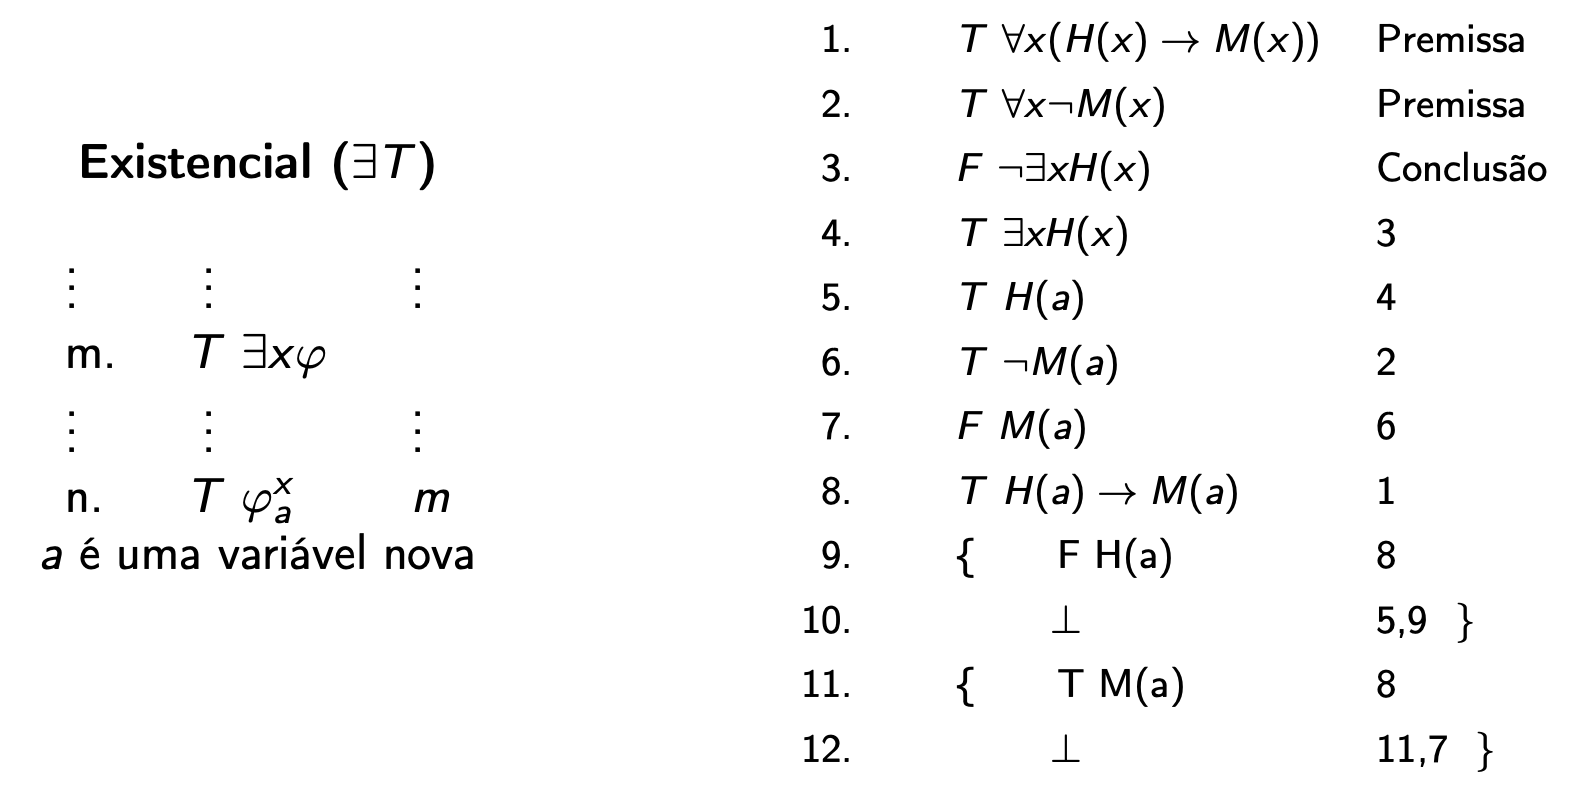

In [ ]:
#@title ANITA - Exemplo: $\forall x(H(x)\rightarrow M(x)), \forall x \lnot M(x)\vdash \lnot \exists x H(x)$ 
#@markdown Execute essa célula para gerar o seu exercício.
anita('''1. T Ax(H(x)->M(x))     pre
2. T Ax ~M(x)           pre
3. F ~Ex H(x)           conclusao
4. T Ex H(x)            3
5. T H(a)               4
6. T ~M(a)              2
7. F M(a)               6
8. T H(a)->M(a)         1
9. {  F H(a)            8
10.   @                 5,9 }
11.{  T M(a)            8
12.   @                 11,7 }''', height_layout='190px')

## Regra do Existencial $\exists F$

A **regra do existencial $\exists F$** é apresentada na Figura abaixo, na qual, a partir da fórmula $\exists x\varphi$ marcada com $F$, na linha $m$, podemos concluir, na linha $n$, a fórmula $\varphi^x_t$ marcada com $F$, desde que o termo $t$ seja substituível para a variável $x$ em $\varphi$. Lembre-se que $\lnot \exists x\varphi(x)\vdash \forall x \lnot \varphi(x)$. Na Figura abaixo, ilustramos o uso desta regra para concluir $F~P(a)$ na linha $5$, a partir da $F~\exists x H(x)$ da linha $4$.

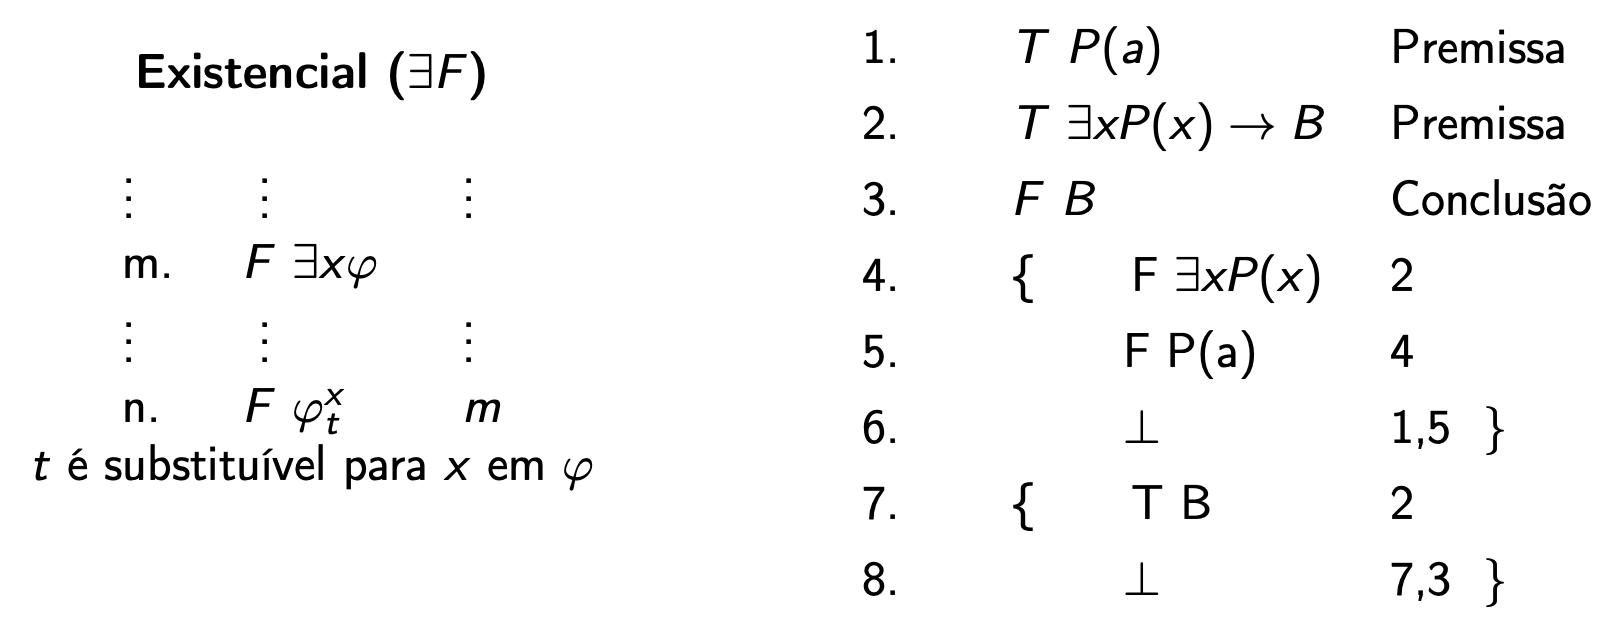

In [ ]:
#@title ANITA - Exemplo: $P(a), \exists x P(x)\rightarrow B\vdash B$ 
#@markdown Execute essa célula para gerar o seu exercício.
anita('''1. T P(a)               pre
2. T Ex P(x) -> B       pre
3. F B                  conclusao
4. {  F Ex P(x)         2
5.    F P(a)            4
6.    @                 1,5 }
7. {  T B               2
8.    @                 7,3 }''', height_layout='130px')

## Erros nas Regras do Universal e do Existencial
Importante ressaltar que as restrições impostas as regras da introdução do universal e da eliminação do existencial são fundamentais para que todas as demonstrações sejam corretas. Na sequência, iremos apresentar alguns exemplos de demonstrações incorretas que não observam as restrições podem nos conduzir a conclusões erradas a partir de um conjunto de premissas. Os exemplos serão definidos no NADIA e os respectivos erros serão apontados pela ferramenta.

In [ ]:
#@title ANITA - Exemplo de Demonstração incorreta: $P(a)\vdash \forall x P(x)$
#@markdown Execute essa célula para gerar o seu exercício.
#@markdown > **Erro:** Na regra do universal ($\forall F$), a variável escolhida não pode ocorrer anteriormente.
anita('''1. T P(a)           pre
2. F Ax P(x)        conclusao
3. F P(a)           2
4. @                1,3''', height_layout='80px')

In [ ]:
#@title ANITA - Exemplo de Demonstração incorreta: $\exists x P(x)\vdash P(a)$
#@markdown Execute essa célula para gerar o seu exercício.
#@markdown > **Erro:** Na regra do existencial ($\exists T$), a variável escolhida na eliminação não pode ocorrer.
anita('''1. T Ex P(x)   pre
2. F P(a)      conclusao
3. T P(a)      1
4. @           3,2''', height_layout='80px')

In [ ]:
#@title ANITA - Exemplo de Demonstração incorreta: $\exists x~Par(x), \exists x~Impar(x)\vdash \exists x (Par(x)\land Impar(x))$
#@markdown Execute essa célula para gerar o seu exercício.
#@markdown > **Erro:** Na regra do existencial ($\exists T$), a variável escolhida na eliminação já ocorria anteriormente.
anita('''1. T Ex PAR(x)                 pre
2. T Ex IMPAR(x)               pre
3. F Ex (PAR(x)&IMPAR(x))      conclusao
4. T PAR(a)                    1
5. T IMPAR(a)                  2
6. F PAR(a)&IMPAR(a)           3
7. { F PAR(a)                  6
8.   @                         4,7 }
9. { F IMPAR(a)                6
10.  @                         5,9 }''', height_layout='160px')

In [ ]:
#@title ANITA - Exemplo de Demonstração incorreta: $\forall y \exists x~MENOR(y,x)\vdash \exists x~MENOR(x,x)$
#@markdown Execute essa célula para gerar o seu exercício.
#@markdown > **Erro:** Na eliminação do existencial, a variável escolhida na eliminação já ocorria anteriormente.
anita('''1. T Ay Ex MENOR(y,x)       pre
2. F Ex MENOR(x,x)          conclusao
3. T Ex MENOR(a,x)          1
4. T MENOR(a,a)             3
5. F MENOR(a,a)             2
6. @                        4,5''', height_layout='100px')

## Exercícios de Tableau Analítico

In [ ]:
#@title ANITA - Exercício 1
#@markdown Execute essa célula para gerar o seu exercício.
anita_theorem(lTheorems[randrange(41,44)])


In [ ]:
#@title ANITA - Exercício 2
#@markdown Execute essa célula para gerar o seu exercício.
anita_theorem(lTheorems[randrange(45,48)])

In [ ]:
#@title ANITA - Exercício 3
#@markdown Execute essa célula para gerar o seu exercício.
anita_theorem(lTheorems[randrange(49,52)])

In [ ]:
#@title ANITA - Exercício 4
#@markdown Execute essa célula para gerar o seu exercício.
anita_theorem(lTheorems[randrange(49,52)])

In [ ]:
#@title ANITA - Exercício 5
#@markdown Execute essa célula para gerar o seu exercício.
anita_theorem(lTheorems[randrange(53,61)])

### Exercícios sobre Especificação e Tableau Analítico

In [ ]:
#@title Exemplo 1: Raciocínio em Lógica de Primeira-Ordem
#@markdown Execute essa célula para gerar o seu exemplo.
verify_reasoning_fo_q1_ex()
anita('''# Considere a seguinte linguagem não lógica:
# - 𝑃 um predicado de aridade 1 para "gosta de voo de parapente".
# - 𝑅 um predicado de aridade 1 para "gosta de esporte radical".
# - 𝑚 uma constante para "Maria".
# Representemos as afirmações através das seguintes fórmulas:
# - Ax(𝑃(𝑥)->𝑅(𝑥)) para "Quem gosta de voo de parapente gosta de esporte radical".
# - 𝑃(𝑚) para "Maria gosta de voo de parapente".
# - 𝑅(𝑚) para "Maria gosta de esporte radical".
# Assim, devemos verificar se o raciocínio abaixo é válido:
# Ax(𝑃(x)->𝑅(x)),𝑃(m)|-𝑅(m)
1. T Ax (P(x)->R(x))    pre
2. T P(m)               pre
3. F R(m)               conclusao
4. T P(m)->R(m)         1
5. { F P(m)             4
6.   @                  2,5
   }
7. { T R(m)             4
8.   @                  3,7
   }''',height_layout='340px')

In [ ]:
#@title Exemplo 2: Raciocínio em Lógica de Primeira-Ordem
#@markdown Execute essa célula para gerar o seu exemplo.
verify_reasoning_fo_q2_ex()
anita('''# Considere a seguinte linguagem não lógica:
# - 𝑃  um predicado de aridade 1 para "gosta de voo de parapente".
# - 𝐶  um predicado de aridade 1 para "gosta de chuva".
# - 𝑗 uma constante para "João".
# Representemos as afirmações através das seguintes fórmulas:
# - ∀𝑥(𝑃(𝑥)->~𝐶(𝑥))  para "Quem gosta de voo de parapente não gosta de chuva".
# - 𝐶(𝑗)  para "João gosta chuva".
# - ~𝑃(𝑗)  para "João não gosta de voo de parapente".
# Assim, devemos verificar se o raciocínio abaixo é válido:
# A𝑥(𝑃(x)->~𝐶(x)),𝐶(j) |- ~𝑃(𝑗)
1. T Ax (P(x)-> ~C(x))      pre
2. T C(j)                   pre
3. F ~P(j)                  conclusao
4. T P(j)                   3
5. T P(j)->~C(j)            1
6. { F P(j)                 5
7.   @                      4,6 
   }
8. { T ~C(j)                5
9.   F C(j)                 8
10.  @                      2,9 
   }''',height_layout='360px')

In [ ]:
#@title Exemplo 5: Raciocínio em Lógica Proposicional
#@markdown Execute essa célula para gerar o seu exemplo.
verify_reasoning_fo_q5_ex()
anita('''# Considere a seguinte linguagem não lógica:
# - 𝐴 um predicado de aridade 2 para "amado".
# - H um predicado de aridade 1 para "feliz".
# Representemos as afirmações através das seguintes fórmulas:
# - Ax Ey(𝐴(x,y)->H(x)) para "Todo mundo que é amado por alguém é feliz".
# - Ex ~H(x) para "Existe alguém que não é feliz".
# - Ex ~Ay A(x,y) para "Existe alguém que não é amado por ninguém".
# Assim, devemos verificar se o raciocínio abaixo é válido:
# Ax Ey(A(x,y)->H(x)), Ex ~H(x) |- Ex ~Ay A(x,y)
1. T Ax Ey (A(x,y) -> H(x))     pre
2. T Ex ~H(x)                   pre
3. F Ex ~Ay A(x,y)              conclusao
4. T ~H(a)			              2
5. F H(a)			              4
6. T Ey (A(a,y)->H(a))       	  1
7. T (A(a,b)->H(a))             6
8. { F A(a,b)                   7
9.   F ~Ay A(a,y)               3
10.  T Ay A(a,y)                9
11.  T A(a,b)                   10
12.  @                          8,11
   }
13.{ T H(a)                     7
14.  @                          5,13
   }''',height_layout='390px')

In [ ]:
#@title Exercício 2: Raciocínio em Lógica de Primeira-Ordem
#@markdown Execute essa célula para gerar o seu exemplo.
verify_reasoning_fo_q2()
anita('''# Considere a seguinte linguagem não lógica:
# - ...
# - ...
# Representemos as afirmações através das seguintes fórmulas:
# - ...
# - ...
# - ...
# Assim, devemos verificar se o raciocínio abaixo é válido:
# ...
''',height_layout='300px')

In [ ]:
#@title Exercício 4: Raciocínio em Lógica de Primeira-Ordem
#@markdown Execute essa célula para gerar o seu exemplo.
verify_reasoning_fo_q4()
anita('''# Considere a seguinte linguagem não lógica:
# - ...
# - ...
# Representemos as afirmações através das seguintes fórmulas:
# - ...
# - ...
# - ...
# Assim, devemos verificar se o raciocínio abaixo é válido:
# ...
''',height_layout='300px')

In [ ]:
#@title Exercício 6: Raciocínio em Lógica de Primeira-Ordem
#@markdown Execute essa célula para gerar o seu exemplo.
verify_reasoning_fo_q6()
anita('''# Considere a seguinte linguagem não lógica:
# - ...
# - ...
# Representemos as afirmações através das seguintes fórmulas:
# - ...
# - ...
# - ...
# - ...
# Assim, devemos verificar se o raciocínio abaixo é válido:
# ...
''',height_layout='300px')

In [ ]:
#@title Exercício 7: Raciocínio em Lógica de Primeira-Ordem
#@markdown Execute essa célula para gerar o seu exemplo.
verify_reasoning_fo_q7()
anita('''# Considere a seguinte linguagem não lógica:
# - ...
# - ...
# Representemos as afirmações através das seguintes fórmulas:
# - ...
# - ...
# - ...
# Assim, devemos verificar se o raciocínio abaixo é válido:
# ...
''',height_layout='300px')

In [ ]:
#@title Exercício 10: Raciocínio em Lógica de Primeira-Ordem
#@markdown Execute essa célula para gerar o seu exemplo.
verify_reasoning_fo_q10()
anita('''# Considere a seguinte linguagem não lógica:
# - ...
# - ...
# Representemos as afirmações através das seguintes fórmulas:
# - ...
# - ...
# - ...
# Assim, devemos verificar se o raciocínio abaixo é válido:
# ...
''',height_layout='300px')

<!--NAVIGATION-->
< [Dedução Natural da Lógica de Primeira-Ordem no Estilo de Gentzen](./Cap%C3%ADtulo%2012.2%20-%20Dedu%C3%A7%C3%A3o%20Natural%20da%20L%C3%B3gica%20de%20Primeira-Ordem%20no%20Estilo%20de%20Gentzen.ipynb) | [Índice](./Index.ipynb)  >